# Preventing Credit Card Defaults - Part 2

In this activity, you will continue working on the neural network model to prevent credit card defaults. In this second part, you will compile, fit, and evaluate the model.

## Instructions:

1. Open the notebook, and run all the cells in the Jupyter notebook that correspond to “Preventing Credit Card Defaults Part 1”.

2. Compile the neural network model using the `binary_crossentropy` loss function, the `adam` optimizer, and the additional metric `accuracy`.

3. Fit the model with the training data, using 100 epochs.

4. Plot the model’s loss function and accuracy over the 100 epochs.

5. Evaluate the model using testing data and the `evaluate` method.


## References:

[Keras Sequential model](https://keras.io/api/models/sequential/)

[Keras Dense module](https://keras.io/api/layers/core_layers/dense/)

In [41]:
# Imports
import pandas as pd
from pathlib import Path
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

%matplotlib inline

## Step 1: Run all the cells in the Jupyter notebook that correspond to “Preventing Credit Card Defaults Part 1”.

### Read the CSV file from the Resources folder into a Pandas DataFrame.

In [42]:
# Read the cc_default.csv file from the Resources folder into a Pandas DataFrame
cc_df = pd.read_csv(
    Path("cc_default.csv")
)

# Review the DataFrame
cc_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,"""BILL_AMT4""",BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Define the features set `X` by including all of the DataFrame columns except the “DEFAULT” column.

In [43]:
# Define features set X by selecting all columns but DEFAULT
X = cc_df.drop(columns=["DEFAULT"]).copy()

# Display the features DataFrame
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,"""BILL_AMT4""",BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


### Create the target `y` by assigning the values of the DataFrame “DEFAULT” column.

In [44]:
# Define target set by selecting the DEFAULT column
y = cc_df["DEFAULT"]

# Display a sample y
y[:5]

0    1
1    1
2    0
3    0
4    0
Name: DEFAULT, dtype: int64

### Create the training and testing sets using the `train_test_split` function from scikit-learn.

In [45]:
# Create training and testing datasets using train_test_split
# Assign the function a random_state equal to 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Scale the features data using the `StandardScaler` from sklearn.

In [46]:
# Create the StandardScaler instance
X_scaler = StandardScaler()

In [47]:
# Fit the scaler to the features training dataset
X_scaler.fit(X_train)

StandardScaler()

In [48]:
# Scale both the training and testing data from the features dataset
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Create a neural network model with an input layer that consists of 22 inputs, one hidden layer, and an output layer. Use the `units` parameter to define 12 neurons for the hidden layer and a single output for the output layer. Use the ReLU activation function for the hidden layer and the sigmoid activation function for the output layer.

In [49]:
# Define the the number of inputs to the model
number_inputs = 23

# Define the number of hidden nodes for the model
number_hidden_nodes = 12

# Create the Sequential model instance
neuron = Sequential()

# Add a Dense layer specifying the number of inputs, the number of hidden nodes, and the activation function
neuron.add(Dense(units=number_hidden_nodes, input_dim=number_inputs, activation="relu"))

# Add the output layer to the model specifying the number of output neurons and activation function
neuron.add(Dense(1, activation="sigmoid"))

### Display the model structure using the `summary` function.

In [50]:
# Display the Sequential model summary
neuron.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 12)                288       
                                                                 
 dense_7 (Dense)             (None, 1)                 13        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


## Step 2:  Compile the neural network model using the `binary_crossentropy` loss function, the `adam` optimizer, and the additional metric `accuracy`.

In [51]:
# Compile the Sequential model
neuron.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

## Step 3: Fit the model with 100 epochs using the training data.

In [52]:
# Fit the model using 100 epochs and the training data
model = neuron.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
704/704 [==============================] - 1s 789us/step - loss: 0.5343 - accuracy: 0.7659
Epoch 2/100
704/704 [==============================] - 1s 769us/step - loss: 0.4638 - accuracy: 0.8123
Epoch 3/100
704/704 [==============================] - 1s 791us/step - loss: 0.4546 - accuracy: 0.8141
Epoch 4/100
704/704 [==============================] - 1s 773us/step - loss: 0.4494 - accuracy: 0.8164
Epoch 5/100
704/704 [==============================] - 1s 778us/step - loss: 0.4453 - accuracy: 0.8169
Epoch 6/100
704/704 [==============================] - 1s 775us/step - loss: 0.4423 - accuracy: 0.8180
Epoch 7/100
704/704 [==============================] - 1s 765us/step - loss: 0.4392 - accuracy: 0.8189
Epoch 8/100
704/704 [==============================] - 1s 768us/step - loss: 0.4380 - accuracy: 0.8198
Epoch 9/100
704/704 [==============================] - 1s 773us/step - loss: 0.4367 - accuracy: 0.8199
Epoch 10/100
704/704 [==============================] - 1s 799us/step - l

## Step 4: Plot the model’s loss function and accuracy over the 100 epochs.

In [53]:
# Create a DataFrame using the model history and an index parameter
model_plot = pd.DataFrame(model.history, index=range(1, len(model.history["loss"]) + 1))

model_plot.head(3)

,loss,accuracy
1,0.534336,0.765867
2,0.463830,0.812311
3,0.454605,0.814089


<AxesSubplot:>

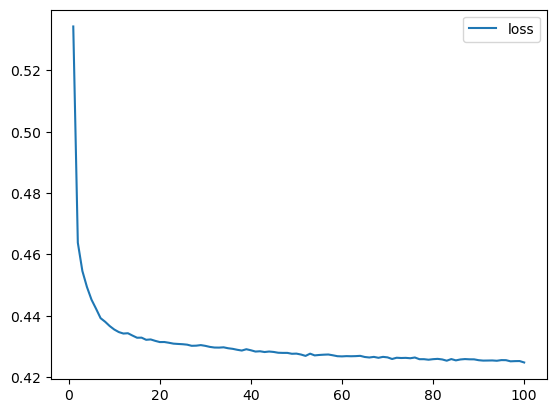

In [54]:
# Vizualize the model plot where the y-axis displays the loss metric
model_plot.plot(y="loss")

<AxesSubplot:>

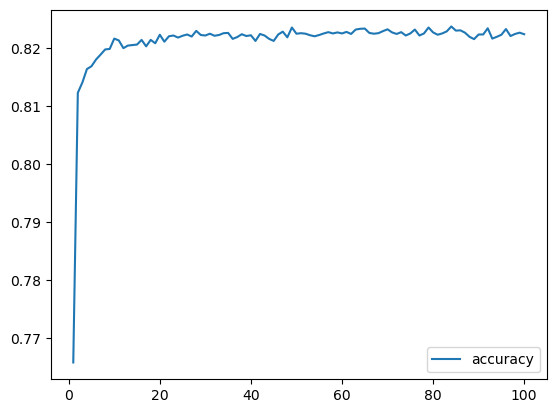

In [55]:
# Vizualize the model plot where the y-axis displays the accuracy metric
model_plot.plot(y="accuracy")


## Step 5: Evaluate the model using testing data and the `evaluate` method.

In [56]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = neuron.evaluate(X_test_scaled, y_test, verbose=2)

# Display the evaluation results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

235/235 - 0s - loss: 0.4405 - accuracy: 0.8139 - 286ms/epoch - 1ms/step
Loss: 0.440478652715683, Accuracy: 0.8138666749000549
